# 0. Wczytanie danych

In [5]:

!pip install kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import kagglehub

path = kagglehub.dataset_download("asaniczka/52000-animation-movie-details-dataset-2024")
print("Path to dataset files:", path)

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv(f"{path}/animation_movies.csv")


Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\asaniczka\52000-animation-movie-details-dataset-2024\versions\1


# 1.Opis zbioru danych

In [6]:
print("Rozmiar zbioru:", df.shape)
print("\nTypy danych:")
print(df.dtypes)
print("\nBraki danych:")
print(df.isnull().sum())

Rozmiar zbioru: (51945, 23)

Typy danych:
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object

Braki danych:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue      

Wnioski: Występują braki danych m.in. w release_date, production_companies, production_countries co należy uwzględnić w dalszej analizie.

# 2. Statystyki opisowe zmiennych numerycznych

In [7]:
print("\nStatystyki opisowe:")
print(df.describe())


Statystyki opisowe:
                 id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  
count  5.194500e+04  51945.000000  
mean   5.759513e+05      1.886233  
std    7.606628e+06      9.700913  
min    0.000000e+00      0.000000  
25%    0.000000e+00      0.600000  
50%    0.000000e+00      0.600000  
75%    0.000000

Wnioski: W zbiorze widoczne są duże rozbieżności wartości m.in. dla budget i revenue, co może wskazywać na obecność outlierów. Wartość średnia vote_average to około 2.6, co sugeruje niskie oceny większości filmów.

# 3. Analiza zmiennych numerycznych w zależności od przynależności do grupy

                        Company  Avg_Score   Avg_Votes
5         Warner Bros. Cartoons   6.354795   18.389535
4         Warner Bros. Pictures   6.147147  132.753176
7                Toei Animation   5.544903   83.004866
1       Walt Disney Productions   5.442242  147.297486
6             Fleischer Studios   4.474396    5.109005
3      Walter Lantz Productions   3.963207    2.221429
2                 Soyuzmultfilm   3.760132    6.731278
8                Famous Studios   2.754483    1.531073
0                     ONF | NFB   2.625549    3.238489
9  Tokyo University of the Arts   0.516601    0.202312


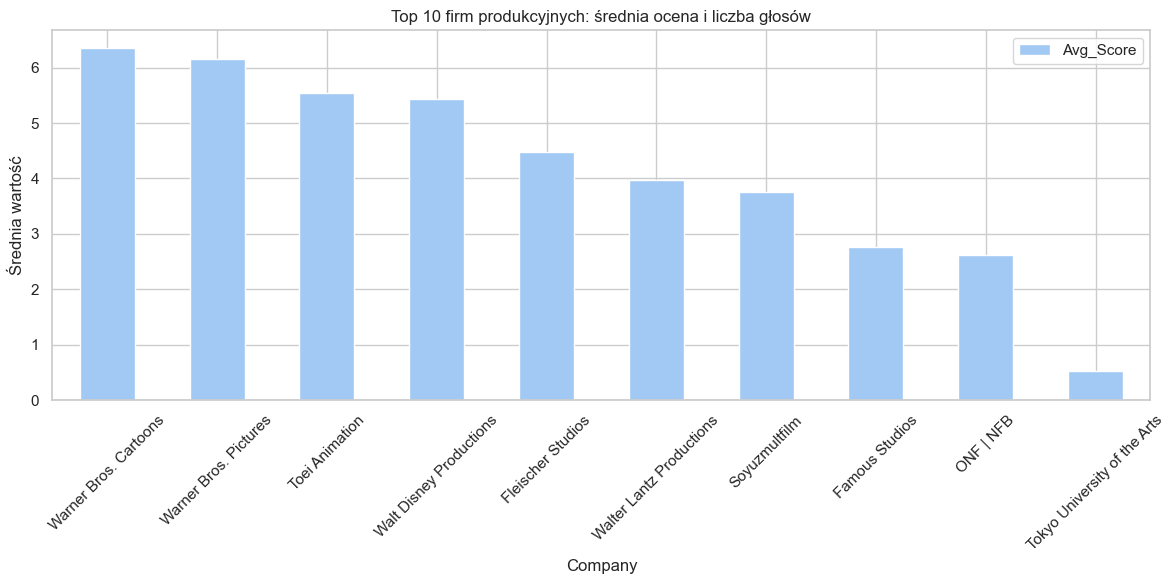

In [18]:
df['production_companies'] = df['production_companies'].fillna('')

company_list = df['production_companies'].apply(lambda x: x.split(', '))
company_flat = [c for sublist in company_list for c in sublist if c]

from collections import Counter
company_counts = Counter(company_flat)
top_companies = [c for c, _ in company_counts.most_common(10)]


rows = []
for company in top_companies:
    filtered = df[df['production_companies'].str.contains(company, na=False)]
    avg_score = filtered['vote_average'].mean()
    avg_votes = filtered['vote_count'].mean()
    rows.append({'Company': company, 'Avg_Score': avg_score, 'Avg_Votes': avg_votes})

top_df = pd.DataFrame(rows).sort_values('Avg_Score', ascending=False)


print(top_df)


top_df.plot(x='Company', y=['Avg_Score'], kind='bar')
plt.title("Top 10 firm produkcyjnych: średnia ocena i liczba głosów")
plt.ylabel("Średnia wartość")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wnioski: Filmy wyprodukowane przez Warner Bros uzyskują przeciętnie wyższe oceny, co może być związane z ich globalnym zasięgiem i promocją.

# 4. Analiza zmiennej typu multilabel — kolumna 'genres'

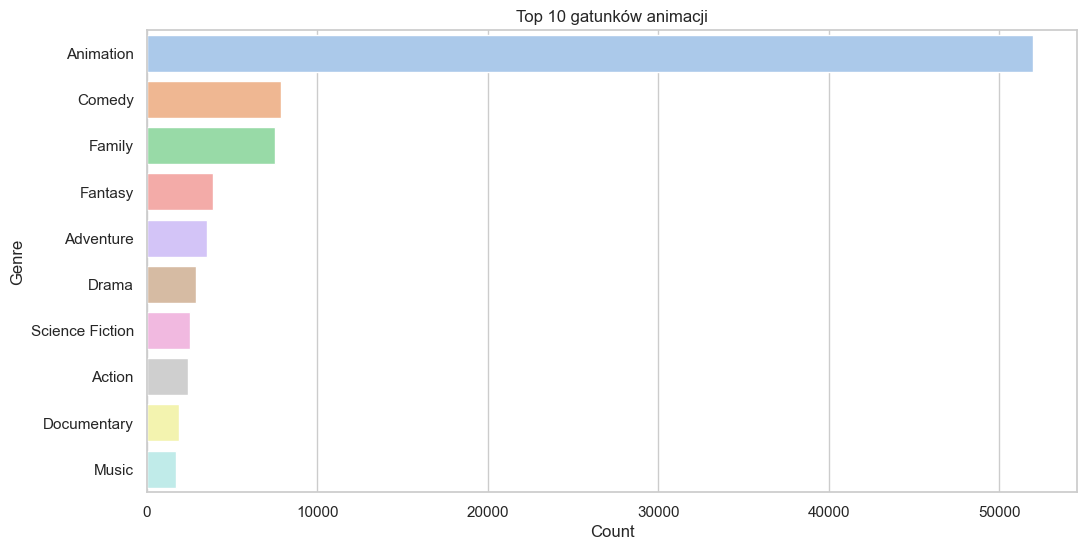

In [14]:
df['genre_list'] = df['genres'].fillna('').apply(lambda x: x.split(', '))
genre_flat = [g for sublist in df['genre_list'] for g in sublist if g]
genre_counts = Counter(genre_flat)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

sns.barplot(x='Count', y='Genre', data=genre_df.head(10))
plt.title("Top 10 gatunków animacji")
plt.show()

Wnioski: Najczęściej występujące gatunki to Animation, Comedy i Family, co potwierdza dominację filmów skierowanych do młodszych widzów i całych rodzin.

# 5.1. Zależność między budżetem a przychodem

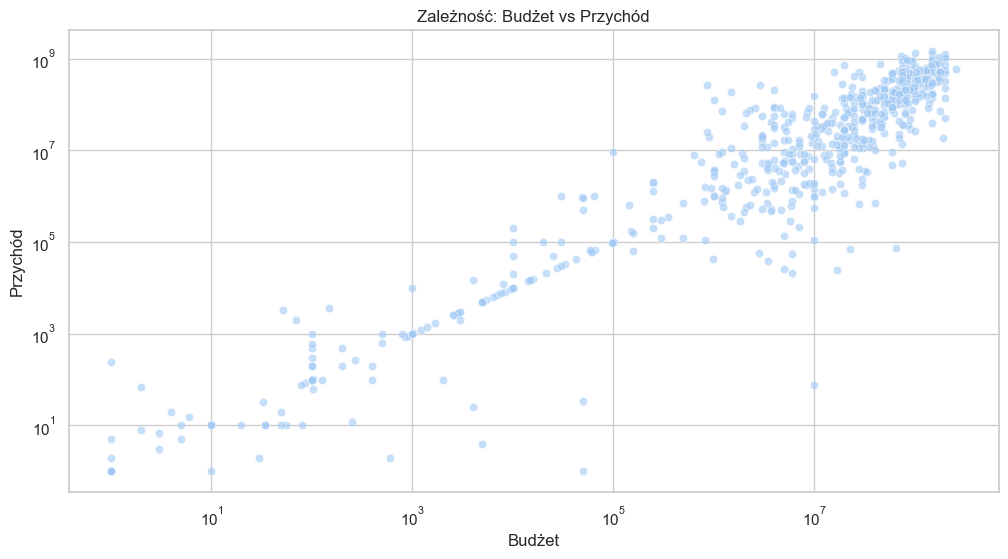

In [15]:
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title("Zależność: Budżet vs Przychód")
plt.xlabel("Budżet")
plt.ylabel("Przychód")
plt.xscale('log')
plt.yscale('log')
plt.show()

Wnioski: Istnieje pozytywna korelacja między budżetem a przychodem — filmy z większym budżetem zazwyczaj osiągają większe przychody, choć zależność nie jest liniowa.

# 5.2. Zależność między oceną a liczbą głosów

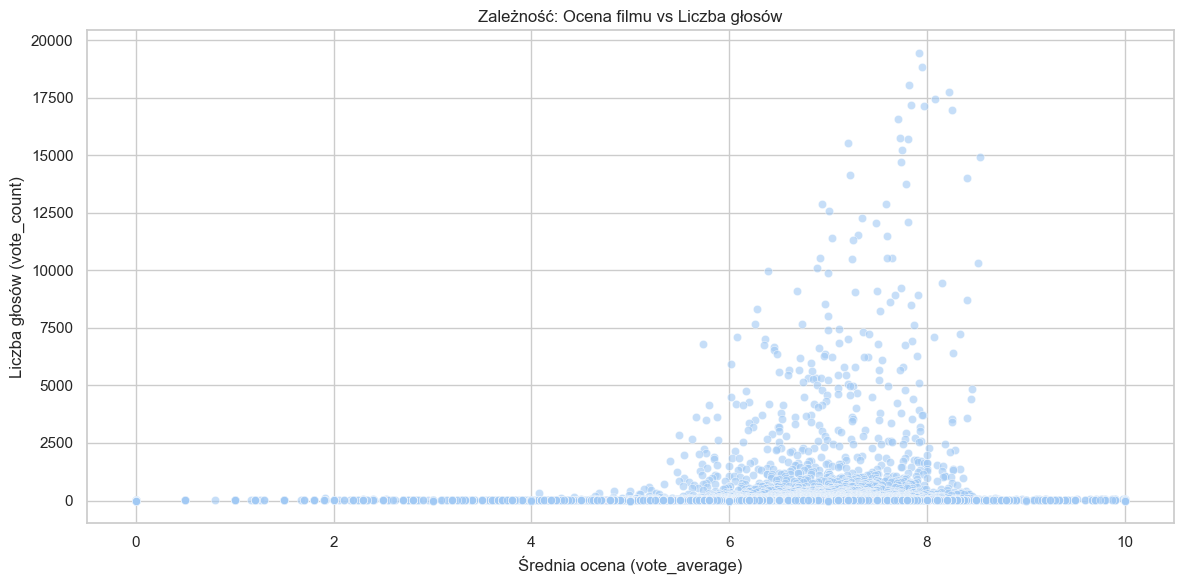

In [17]:
sns.scatterplot(data=df, x='vote_average', y='vote_count', alpha=0.6)
plt.title("Zależność: Ocena filmu vs Liczba głosów")
plt.xlabel("Średnia ocena (vote_average)")
plt.ylabel("Liczba głosów (vote_count)")
plt.tight_layout()
plt.show()

Wnioski: Filmy z wyższą liczbą głosów często otrzymują umiarkowane oceny (6–8), co może świadczyć o większej liczbie ocen przy popularnych, ale niekoniecznie skrajnych tytułach.